# Compare BetaVAE models

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [3]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [4]:
indices = [0, 1]
df = load_experiment_sessions('HMDB', 'jointvae_capacity_nextron', 
    ['experiment01_dms.csv', 'experiment02_dms.csv', 'experiment03_dms.csv', 
     'experiment04_dms.csv', 'experiment05_dms.csv', 'experiment06_dms.csv',
     'experiment07_dms.csv', 'experiment08_dms.csv', 'experiment09_dms.csv'])
# df2 = load_experiment_sessions('HMDB', 'betavae_capacity_nextron', 
#     ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
#      'experiment05.csv', 'experiment06.csv'])
# df = pd.concat([df1, df2], ignore_index=True)
df.to_csv(utils.get_project_path() / '.model' / 'jointvae_hmdb.csv')
df

,name,dataset,full_model_name,layer_config,latent_spec,input_columns,param_temperature,param_limit,param_dropout,param_cont_min_capacity,...,m_test_avg_cos_sim,m_test_avg_eu_dist,m_test_avg_per_chag,m_test_avg_per_diff,"m.train.beta_vae.(0, 1)","m.train.factor_vae.(0, 1)","m.train.mig.(0, 1)","m.eval.beta_vae.(0, 1)","m.eval.factor_vae.(0, 1)","m.eval.mig.(0, 1)"
0,jointvae_capacity,HMDB,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.8612,0.5023,0.999999,0.8544,0.4896,0.999999
1,jointvae_capacity,HMDB,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.9203,0.5023,0.999999,0.9222,0.4888,0.999999
2,jointvae_capacity,HMDB,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.9331,0.5023,0.894034,0.9252,0.4896,0.894034
3,jointvae_capacity,HMDB,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.6026,0.5023,0.999999,0.6056,0.4888,0.999999
4,jointvae_capacity,HMDB,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.7818,0.5058,0.999999,0.7702,0.5074,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,jointvae_capacity,HMDB,jointvae_capacity_100-100-90-50-2-50-90-100-10...,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.5868,0.5036,0.719565,0.5682,0.5066,0.719565
1211,jointvae_capacity,HMDB,jointvae_capacity_100-100-90-50-2-50-90-100-10...,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.8047,0.5073,0.733695,0.8156,0.5024,0.733695
1212,jointvae_capacity,HMDB,jointvae_capacity_100-100-90-50-2-50-90-100-10...,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.9999,0.5036,0.999999,0.9998,0.5066,0.999999
1213,jointvae_capacity,HMDB,jointvae_capacity_100-100-90-50-2-50-90-100-10...,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,0.804153,0.593147,61113.636719,0.422391,0.9146,0.5073,0.999999,0.9058,0.5024,0.999999


In [4]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

In [5]:
import ast
def is_symmetric(row):
    layer_config = ast.literal_eval(row['layer_config'])
    return len(layer_config[0]) == len(layer_config[1])

def depth(row):
    layer_config = ast.literal_eval(row['layer_config'])
    lencoder, ldecoder = len(layer_config[0]) - 2, len(layer_config[1]) - 2
    return max(lencoder, ldecoder)

df['is_symmetric'] = df.apply(is_symmetric, axis=1)
df['depth'] = df.apply(depth, axis=1)


### Add random disentanglement scores for testing

In [6]:
# import itertools as it
# pcols =  ['m.train.factor_vae.'       + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.beta_vae.'       + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.train.factor_vae.'     + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.factor_vae.'     + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.train.mig.'            + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.mig.'            + str(p) for p in it.permutations(indices, len(indices))]

# def random_score(row):
#     for n in pcols:
#         row[n] = np.random.random()
#     return row
# df = df.apply(random_score, axis=1)

### Prepare scores

In [7]:
import itertools as it
def prepare_scores(df, indices=[tuple(indices)]):
    def unpivot_by_name(df, score_name, indices):
        def split(row):
            if 'train' in row['permutation']:
                row['permutation'] = row['permutation'].replace('m.train.' + score_name + '.', '')
                row['split'] = 'train'
            elif 'eval' in row['permutation']:
                row['permutation'] = row['permutation'].replace('m.eval.' + score_name + '.', '')
                row['split'] = 'valid'
            return row
        vars = ['m.train.' + score_name + '.' + str(p) for p in indices] + \
                ['m.eval.' + score_name + '.' + str(p) for p in indices]
        print(vars)
        df1 = df.melt(id_vars=['full_model_name'], value_vars=vars, var_name='permutation', value_name=score_name)
        df1 = df1.apply(split, axis=1)
        return df1
    df1 = unpivot_by_name(df, 'beta_vae', indices)
    df2 = unpivot_by_name(df, 'factor_vae', indices)
    df3 = unpivot_by_name(df, 'mig', indices)
    df_ = pd.merge(df1, df2, on=['full_model_name', 'split', 'permutation'])
    df_ = pd.merge(df_, df3, on=['full_model_name', 'split', 'permutation'])
    df_ = pd.merge(df_, df, on=['full_model_name'])
    return df_


In [9]:
df1 = prepare_scores(df, indices=[tuple(indices)])
df1

['m.train.beta_vae.(0, 1)', 'm.eval.beta_vae.(0, 1)']
['m.train.factor_vae.(0, 1)', 'm.eval.factor_vae.(0, 1)']
['m.train.mig.(0, 1)', 'm.eval.mig.(0, 1)']


,full_model_name,permutation,beta_vae,split,factor_vae,mig,name,dataset,layer_config,latent_spec,...,m_test_avg_per_chag,m_test_avg_per_diff,"m.train.beta_vae.(0, 1)","m.train.factor_vae.(0, 1)","m.train.mig.(0, 1)","m.eval.beta_vae.(0, 1)","m.eval.factor_vae.(0, 1)","m.eval.mig.(0, 1)",is_symmetric,depth
0,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"(0, 1)",0.8612,train,0.5023,0.999999,jointvae_capacity,HMDB,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.8612,0.5023,0.999999,0.8544,0.4896,0.999999,True,1
1,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"(0, 1)",0.8544,valid,0.4896,0.999999,jointvae_capacity,HMDB,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.8612,0.5023,0.999999,0.8544,0.4896,0.999999,True,1
2,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"(0, 1)",0.9203,train,0.5023,0.999999,jointvae_capacity,HMDB,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.9203,0.5023,0.999999,0.9222,0.4888,0.999999,True,1
3,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"(0, 1)",0.9222,valid,0.4888,0.999999,jointvae_capacity,HMDB,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.9203,0.5023,0.999999,0.9222,0.4888,0.999999,True,1
4,jointvae_capacity_100-100-2-100-100_01 (15-01-...,"(0, 1)",0.9331,train,0.5023,0.894034,jointvae_capacity,HMDB,"[[100, 100, 2], [2, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.9331,0.5023,0.894034,0.9252,0.4896,0.894034,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,jointvae_capacity_100-100-90-50-2-50-90-100-10...,"(0, 1)",0.9998,valid,0.5066,0.999999,jointvae_capacity,HMDB,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.9999,0.5036,0.999999,0.9998,0.5066,0.999999,True,3
2426,jointvae_capacity_100-100-90-50-2-50-90-100-10...,"(0, 1)",0.9146,train,0.5073,0.999999,jointvae_capacity,HMDB,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.9146,0.5073,0.999999,0.9058,0.5024,0.999999,True,3
2427,jointvae_capacity_100-100-90-50-2-50-90-100-10...,"(0, 1)",0.9058,valid,0.5024,0.999999,jointvae_capacity,HMDB,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.9146,0.5073,0.999999,0.9058,0.5024,0.999999,True,3
2428,jointvae_capacity_100-100-90-50-2-50-90-100-10...,"(0, 1)",0.9260,train,0.5049,0.894234,jointvae_capacity,HMDB,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",...,61113.636719,0.422391,0.9260,0.5049,0.894234,0.9218,0.5070,0.894234,True,3


## Top models

In [10]:
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.max_rows', 200)

### Best models w.r.t. beta_vae score grouped by layer_config, max_cont_capacity and cont_gamma

In [11]:
df1[['layer_config', 'param_cont_max_capacity', 'param_cont_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_cont_max_capacity', 'param_cont_gamma'])['beta_vae'].idxmax()]

,layer_config,param_cont_max_capacity,param_cont_gamma,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
810,"[[100, 100, 2], [2, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-11-40),0.9439,0.5023,0.999999,0.905914,0.419452,0.427849
1894,"[[100, 100, 2], [2, 100, 100]]",3.0,10.0,jointvae_capacity_100-100-2-100-100_08 (15-01-2022_19-26-12),0.9669,0.5023,0.999999,0.904809,0.424457,0.440227
543,"[[100, 100, 2], [2, 100, 100]]",3.0,20.0,jointvae_capacity_100-100-2-100-100_03 (15-01-2022_19-19-05),0.9860,0.4888,0.999999,0.898055,0.451197,0.479264
819,"[[100, 100, 2], [2, 100, 100]]",5.0,5.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-41-15),0.9940,0.5074,0.999999,0.903932,0.419616,0.434225
1900,"[[100, 100, 2], [2, 100, 100]]",5.0,10.0,jointvae_capacity_100-100-2-100-100_08 (15-01-2022_19-49-40),0.9767,0.5042,0.999999,0.899287,0.445373,0.465936
551,"[[100, 100, 2], [2, 100, 100]]",5.0,20.0,jointvae_capacity_100-100-2-100-100_03 (15-01-2022_19-49-59),0.9616,0.4984,0.999999,0.896777,0.447580,0.465541
827,"[[100, 100, 2], [2, 100, 100]]",10.0,5.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_20-12-02),0.9962,0.5066,0.893415,0.898200,0.446465,0.460851
1904,"[[100, 100, 2], [2, 100, 100]]",10.0,10.0,jointvae_capacity_100-100-2-100-100_08 (15-01-2022_20-04-22),0.9975,0.5042,0.748453,0.898198,0.449278,0.466505
2177,"[[100, 100, 2], [2, 100, 100]]",10.0,20.0,jointvae_capacity_100-100-2-100-100_09 (15-01-2022_20-11-59),0.9836,0.5066,0.893415,0.896201,0.454058,0.483113
973,"[[100, 100, 90, 2], [2, 90, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-90-2-90-100-100_04 (16-01-2022_05-29-00),1.0000,0.5024,0.999999,0.908701,0.416855,0.482061


### Best models w.r.t. factor_vae score grouped by layer_config, max_cont_capacity and cont_gamma

In [12]:
df1[['layer_config', 'param_cont_max_capacity', 'param_cont_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_cont_max_capacity', 'param_cont_gamma'])['factor_vae'].idxmax()]

,layer_config,param_cont_max_capacity,param_cont_gamma,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
0,"[[100, 100, 2], [2, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.8612,0.5023,0.999999,0.907069,0.419272,0.427804
270,"[[100, 100, 2], [2, 100, 100]]",3.0,10.0,jointvae_capacity_100-100-2-100-100_02 (15-01-2022_19-11-40),0.5349,0.5023,0.718508,0.904254,0.425659,0.442926
540,"[[100, 100, 2], [2, 100, 100]]",3.0,20.0,jointvae_capacity_100-100-2-100-100_03 (15-01-2022_19-11-40),0.9534,0.5023,0.999999,0.897084,0.451170,0.475070
9,"[[100, 100, 2], [2, 100, 100]]",5.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-41-19),0.7702,0.5074,0.999999,0.903844,0.427473,0.433432
279,"[[100, 100, 2], [2, 100, 100]]",5.0,10.0,jointvae_capacity_100-100-2-100-100_02 (15-01-2022_19-41-12),0.8840,0.5074,0.999999,0.898231,0.444536,0.466491
549,"[[100, 100, 2], [2, 100, 100]]",5.0,20.0,jointvae_capacity_100-100-2-100-100_03 (15-01-2022_19-41-19),0.8260,0.5074,0.999999,0.897216,0.449906,0.467089
13,"[[100, 100, 2], [2, 100, 100]]",10.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-57-10),0.9646,0.5074,0.895846,0.897342,0.445881,0.466398
283,"[[100, 100, 2], [2, 100, 100]]",10.0,10.0,jointvae_capacity_100-100-2-100-100_02 (15-01-2022_19-57-18),0.9598,0.5074,0.895846,0.897882,0.450380,0.467114
553,"[[100, 100, 2], [2, 100, 100]]",10.0,20.0,jointvae_capacity_100-100-2-100-100_03 (15-01-2022_19-57-18),0.8060,0.5074,0.733425,0.898031,0.447706,0.474233
162,"[[100, 100, 90, 2], [2, 90, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-26-49),0.9968,0.5073,0.999999,0.905249,0.426093,0.558006


### Best models w.r.t. MIG score grouped by layer_config, max_cont_capacity and cont_gamma

In [13]:
df1[['layer_config', 'param_cont_max_capacity', 'param_cont_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_cont_max_capacity', 'param_cont_gamma'])['mig'].idxmax()]

,layer_config,param_cont_max_capacity,param_cont_gamma,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
0,"[[100, 100, 2], [2, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.8612,0.5023,0.999999,0.907069,0.419272,0.427804
274,"[[100, 100, 2], [2, 100, 100]]",3.0,10.0,jointvae_capacity_100-100-2-100-100_02 (15-01-2022_19-26-23),0.8793,0.5023,0.999999,0.899887,0.439652,0.460235
540,"[[100, 100, 2], [2, 100, 100]]",3.0,20.0,jointvae_capacity_100-100-2-100-100_03 (15-01-2022_19-11-40),0.9534,0.5023,0.999999,0.897084,0.451170,0.475070
8,"[[100, 100, 2], [2, 100, 100]]",5.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-41-19),0.7818,0.5058,0.999999,0.903844,0.427473,0.433432
278,"[[100, 100, 2], [2, 100, 100]]",5.0,10.0,jointvae_capacity_100-100-2-100-100_02 (15-01-2022_19-41-12),0.8822,0.5058,0.999999,0.898231,0.444536,0.466491
548,"[[100, 100, 2], [2, 100, 100]]",5.0,20.0,jointvae_capacity_100-100-2-100-100_03 (15-01-2022_19-41-19),0.8315,0.5058,0.999999,0.897216,0.449906,0.467089
822,"[[100, 100, 2], [2, 100, 100]]",10.0,5.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-57-23),0.9562,0.5058,0.999999,0.900685,0.440010,0.460715
1092,"[[100, 100, 2], [2, 100, 100]]",10.0,10.0,jointvae_capacity_100-100-2-100-100_05 (15-01-2022_19-57-18),0.9389,0.5058,0.999999,0.898083,0.442548,0.472680
2172,"[[100, 100, 2], [2, 100, 100]]",10.0,20.0,jointvae_capacity_100-100-2-100-100_09 (15-01-2022_19-57-19),0.9364,0.5058,0.999999,0.898458,0.448258,0.474245
974,"[[100, 100, 90, 2], [2, 90, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-90-2-90-100-100_04 (16-01-2022_05-36-51),0.9927,0.5049,0.999999,0.908187,0.419041,0.518209


### Best models w.r.t. beta_vae score grouped by layer_config, max_disc_capacity and disc_gamma

In [14]:
df1[['layer_config', 'param_disc_max_capacity', 'param_disc_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_disc_max_capacity', 'param_disc_gamma'])['beta_vae'].idxmax()]

,layer_config,param_disc_max_capacity,param_disc_gamma,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
13,"[[100, 100, 2], [2, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-57-10),0.9646,0.5074,0.895846,0.897342,0.445881,0.466398
822,"[[100, 100, 2], [2, 100, 100]]",3.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-57-23),0.9562,0.5058,0.999999,0.900685,0.440010,0.460715
2160,"[[100, 100, 2], [2, 100, 100]]",3.0,20.0,jointvae_capacity_100-100-2-100-100_09 (15-01-2022_19-11-40),0.9631,0.5023,0.999999,0.898615,0.445513,0.464337
543,"[[100, 100, 2], [2, 100, 100]]",5.0,5.0,jointvae_capacity_100-100-2-100-100_03 (15-01-2022_19-19-05),0.9860,0.4888,0.999999,0.898055,0.451197,0.479264
819,"[[100, 100, 2], [2, 100, 100]]",5.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-41-15),0.9940,0.5074,0.999999,0.903932,0.419616,0.434225
1904,"[[100, 100, 2], [2, 100, 100]]",5.0,20.0,jointvae_capacity_100-100-2-100-100_08 (15-01-2022_20-04-22),0.9975,0.5042,0.748453,0.898198,0.449278,0.466505
286,"[[100, 100, 2], [2, 100, 100]]",10.0,5.0,jointvae_capacity_100-100-2-100-100_02 (15-01-2022_20-11-50),0.9778,0.5036,0.999999,0.898910,0.444710,0.465750
827,"[[100, 100, 2], [2, 100, 100]]",10.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_20-12-02),0.9962,0.5066,0.893415,0.898200,0.446465,0.460851
1637,"[[100, 100, 2], [2, 100, 100]]",10.0,20.0,jointvae_capacity_100-100-2-100-100_07 (15-01-2022_20-11-56),0.9916,0.5066,0.999999,0.898546,0.444185,0.460175
168,"[[100, 100, 90, 2], [2, 90, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),1.0000,0.5023,0.787380,0.915626,0.398804,0.460330


### Best models w.r.t. factor_vae score grouped by layer_config, max_disc_capacity and disc_gamma

In [15]:
df1[['layer_config', 'param_disc_max_capacity', 'param_disc_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_disc_max_capacity', 'param_disc_gamma'])['factor_vae'].idxmax()]

,layer_config,param_disc_max_capacity,param_disc_gamma,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
13,"[[100, 100, 2], [2, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-57-10),0.9646,0.5074,0.895846,0.897342,0.445881,0.466398
823,"[[100, 100, 2], [2, 100, 100]]",3.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-57-23),0.9560,0.5074,0.999999,0.900685,0.440010,0.460715
1633,"[[100, 100, 2], [2, 100, 100]]",3.0,20.0,jointvae_capacity_100-100-2-100-100_07 (15-01-2022_19-57-10),0.8822,0.5074,0.999999,0.901364,0.439835,0.448225
9,"[[100, 100, 2], [2, 100, 100]]",5.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-41-19),0.7702,0.5074,0.999999,0.903844,0.427473,0.433432
819,"[[100, 100, 2], [2, 100, 100]]",5.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-41-15),0.9940,0.5074,0.999999,0.903932,0.419616,0.434225
1629,"[[100, 100, 2], [2, 100, 100]]",5.0,20.0,jointvae_capacity_100-100-2-100-100_07 (15-01-2022_19-41-13),0.7418,0.5074,0.729690,0.905569,0.422066,0.422917
17,"[[100, 100, 2], [2, 100, 100]]",10.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_20-11-52),0.8292,0.5066,0.999999,0.900661,0.443260,0.455544
827,"[[100, 100, 2], [2, 100, 100]]",10.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_20-12-02),0.9962,0.5066,0.893415,0.898200,0.446465,0.460851
1637,"[[100, 100, 2], [2, 100, 100]]",10.0,20.0,jointvae_capacity_100-100-2-100-100_07 (15-01-2022_20-11-56),0.9916,0.5066,0.999999,0.898546,0.444185,0.460175
175,"[[100, 100, 90, 2], [2, 90, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_06-13-33),0.9100,0.5074,0.999999,0.899512,0.437313,0.527323


### Best models w.r.t. MIG score grouped by layer_config, max_disc_capacity and disc_gamma

In [16]:
df1[['layer_config', 'param_disc_max_capacity', 'param_disc_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_disc_max_capacity', 'param_disc_gamma'])['mig'].idxmax()]

,layer_config,param_disc_max_capacity,param_disc_gamma,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
0,"[[100, 100, 2], [2, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.8612,0.5023,0.999999,0.907069,0.419272,0.427804
822,"[[100, 100, 2], [2, 100, 100]]",3.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-57-23),0.9562,0.5058,0.999999,0.900685,0.440010,0.460715
1632,"[[100, 100, 2], [2, 100, 100]]",3.0,20.0,jointvae_capacity_100-100-2-100-100_07 (15-01-2022_19-57-10),0.8787,0.5058,0.999999,0.901364,0.439835,0.448225
8,"[[100, 100, 2], [2, 100, 100]]",5.0,5.0,jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-41-19),0.7818,0.5058,0.999999,0.903844,0.427473,0.433432
818,"[[100, 100, 2], [2, 100, 100]]",5.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-41-15),0.9933,0.5058,0.999999,0.903932,0.419616,0.434225
1898,"[[100, 100, 2], [2, 100, 100]]",5.0,20.0,jointvae_capacity_100-100-2-100-100_08 (15-01-2022_19-41-04),0.9273,0.5058,0.999999,0.899462,0.444031,0.460407
274,"[[100, 100, 2], [2, 100, 100]]",10.0,5.0,jointvae_capacity_100-100-2-100-100_02 (15-01-2022_19-26-23),0.8793,0.5023,0.999999,0.899887,0.439652,0.460235
814,"[[100, 100, 2], [2, 100, 100]]",10.0,10.0,jointvae_capacity_100-100-2-100-100_04 (15-01-2022_19-26-28),0.9017,0.5023,0.999999,0.905252,0.421838,0.429169
1894,"[[100, 100, 2], [2, 100, 100]]",10.0,20.0,jointvae_capacity_100-100-2-100-100_08 (15-01-2022_19-26-12),0.9669,0.5023,0.999999,0.904809,0.424457,0.440227
174,"[[100, 100, 90, 2], [2, 90, 100, 100]]",3.0,5.0,jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_06-13-33),0.9113,0.5058,0.999999,0.899512,0.437313,0.527323


## Scores per parameters

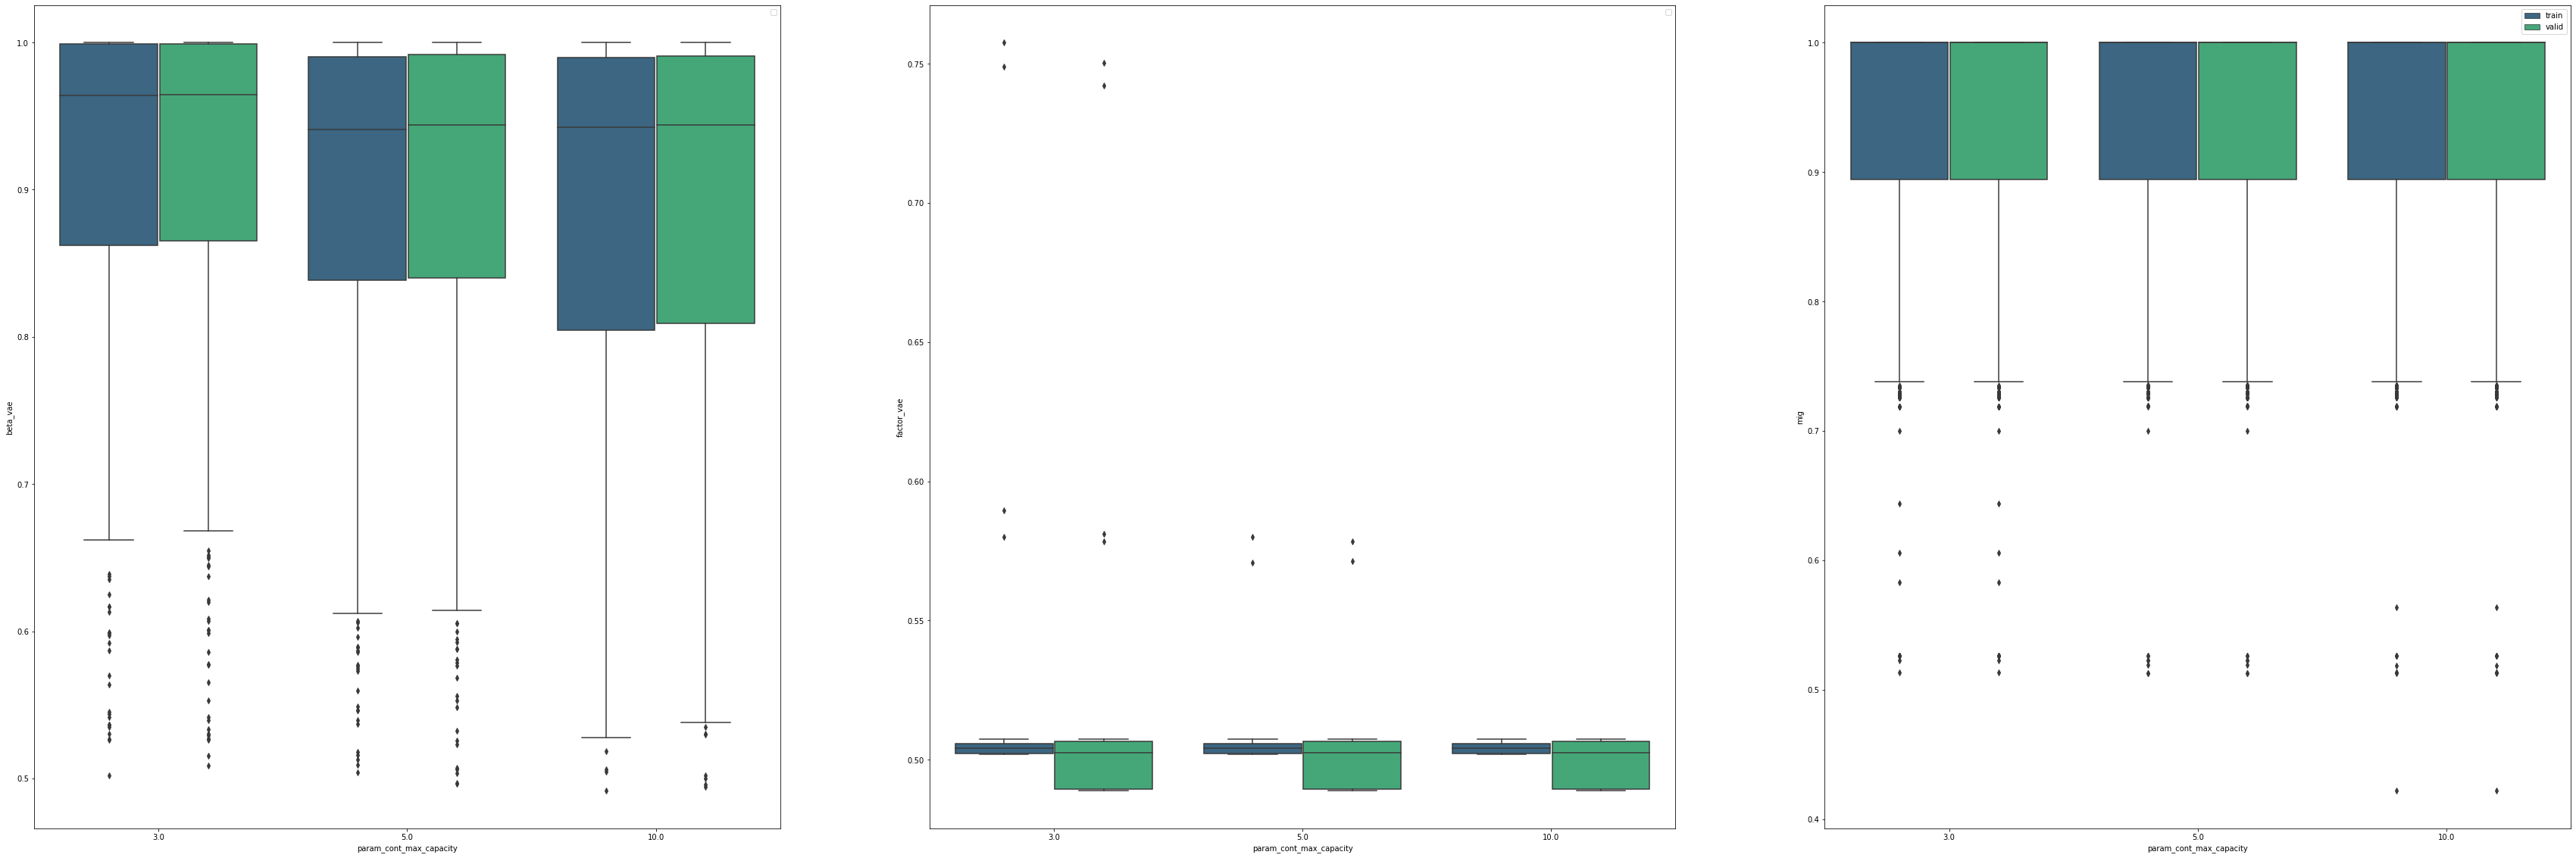

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_cont_max_capacity', y='beta_vae', hue='split', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_cont_max_capacity', y='factor_vae', hue='split', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_cont_max_capacity', y='mig', hue='split', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

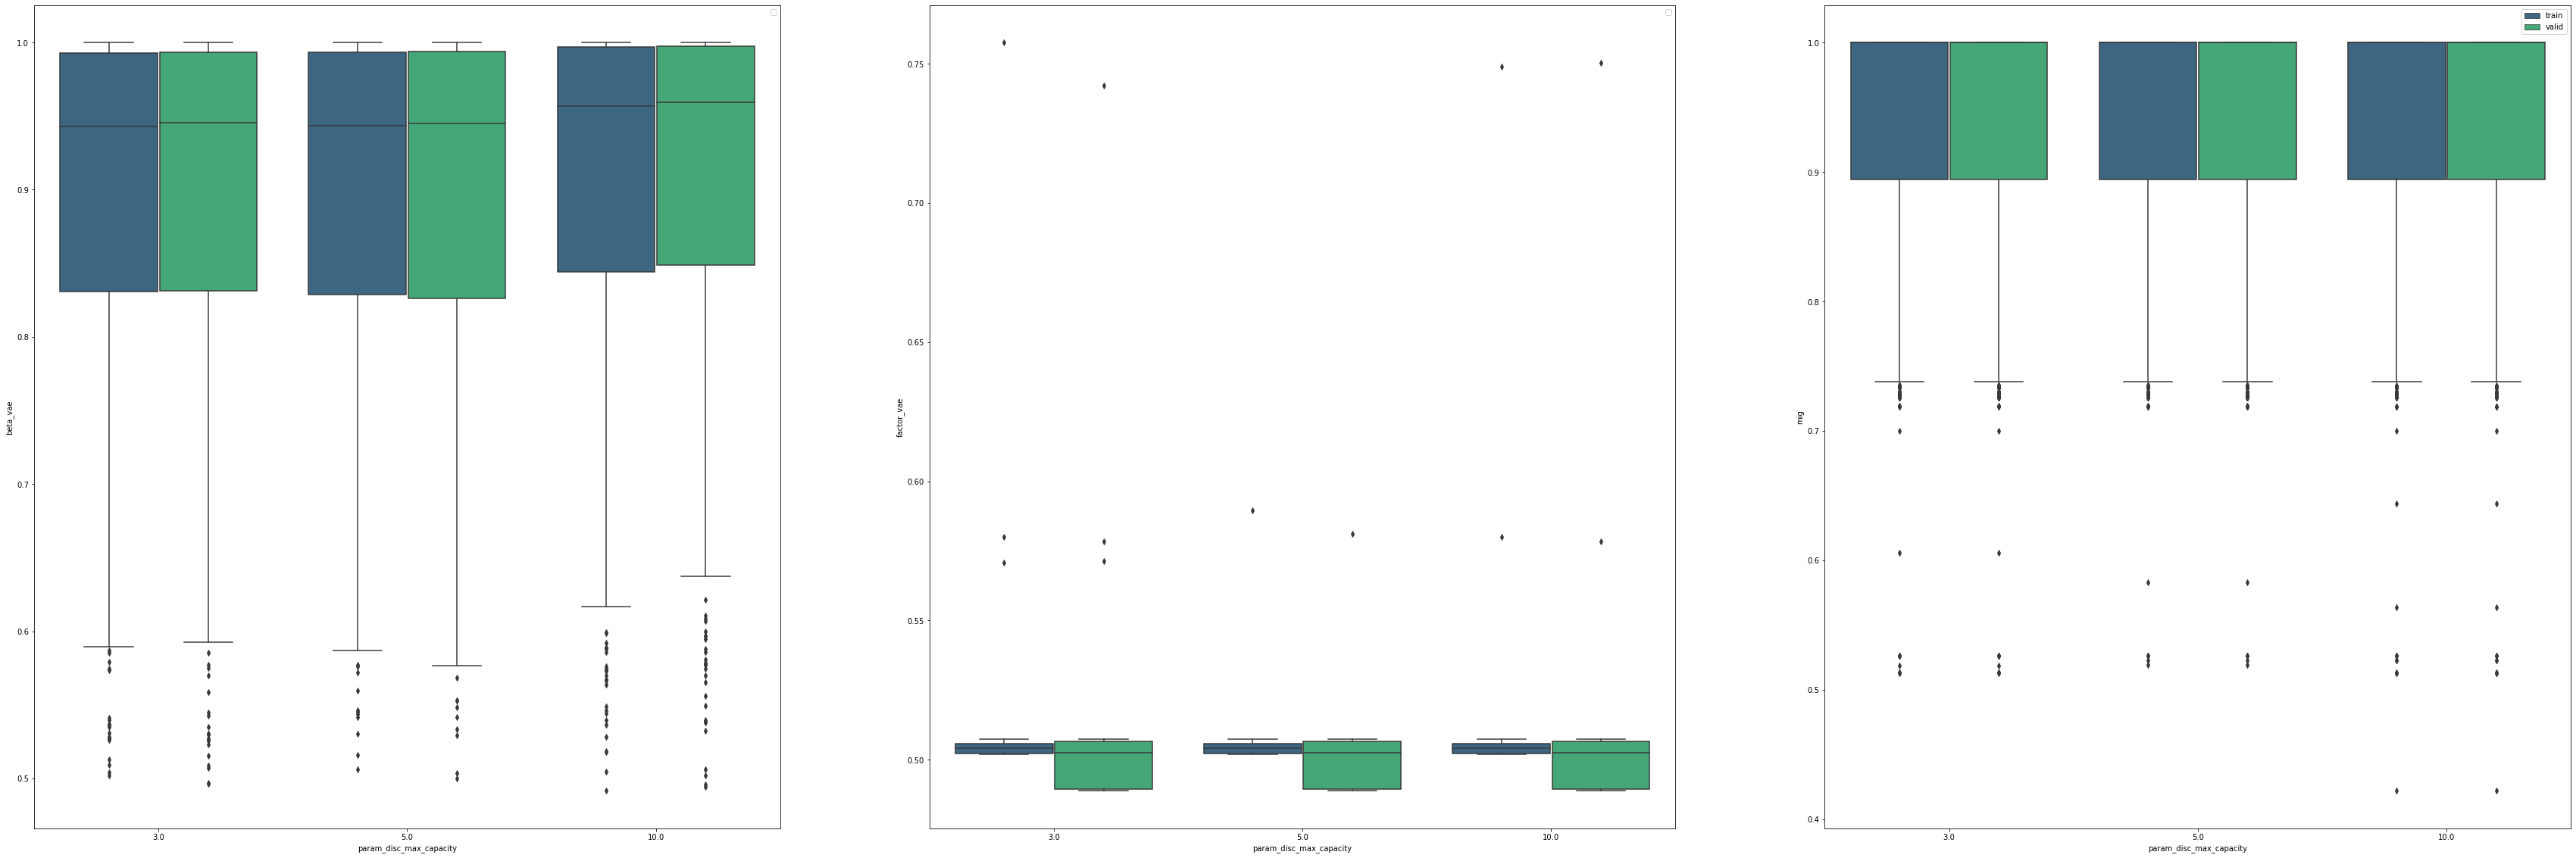

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_disc_max_capacity', y='beta_vae', hue='split', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_disc_max_capacity', y='factor_vae', hue='split', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_disc_max_capacity', y='mig', hue='split', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

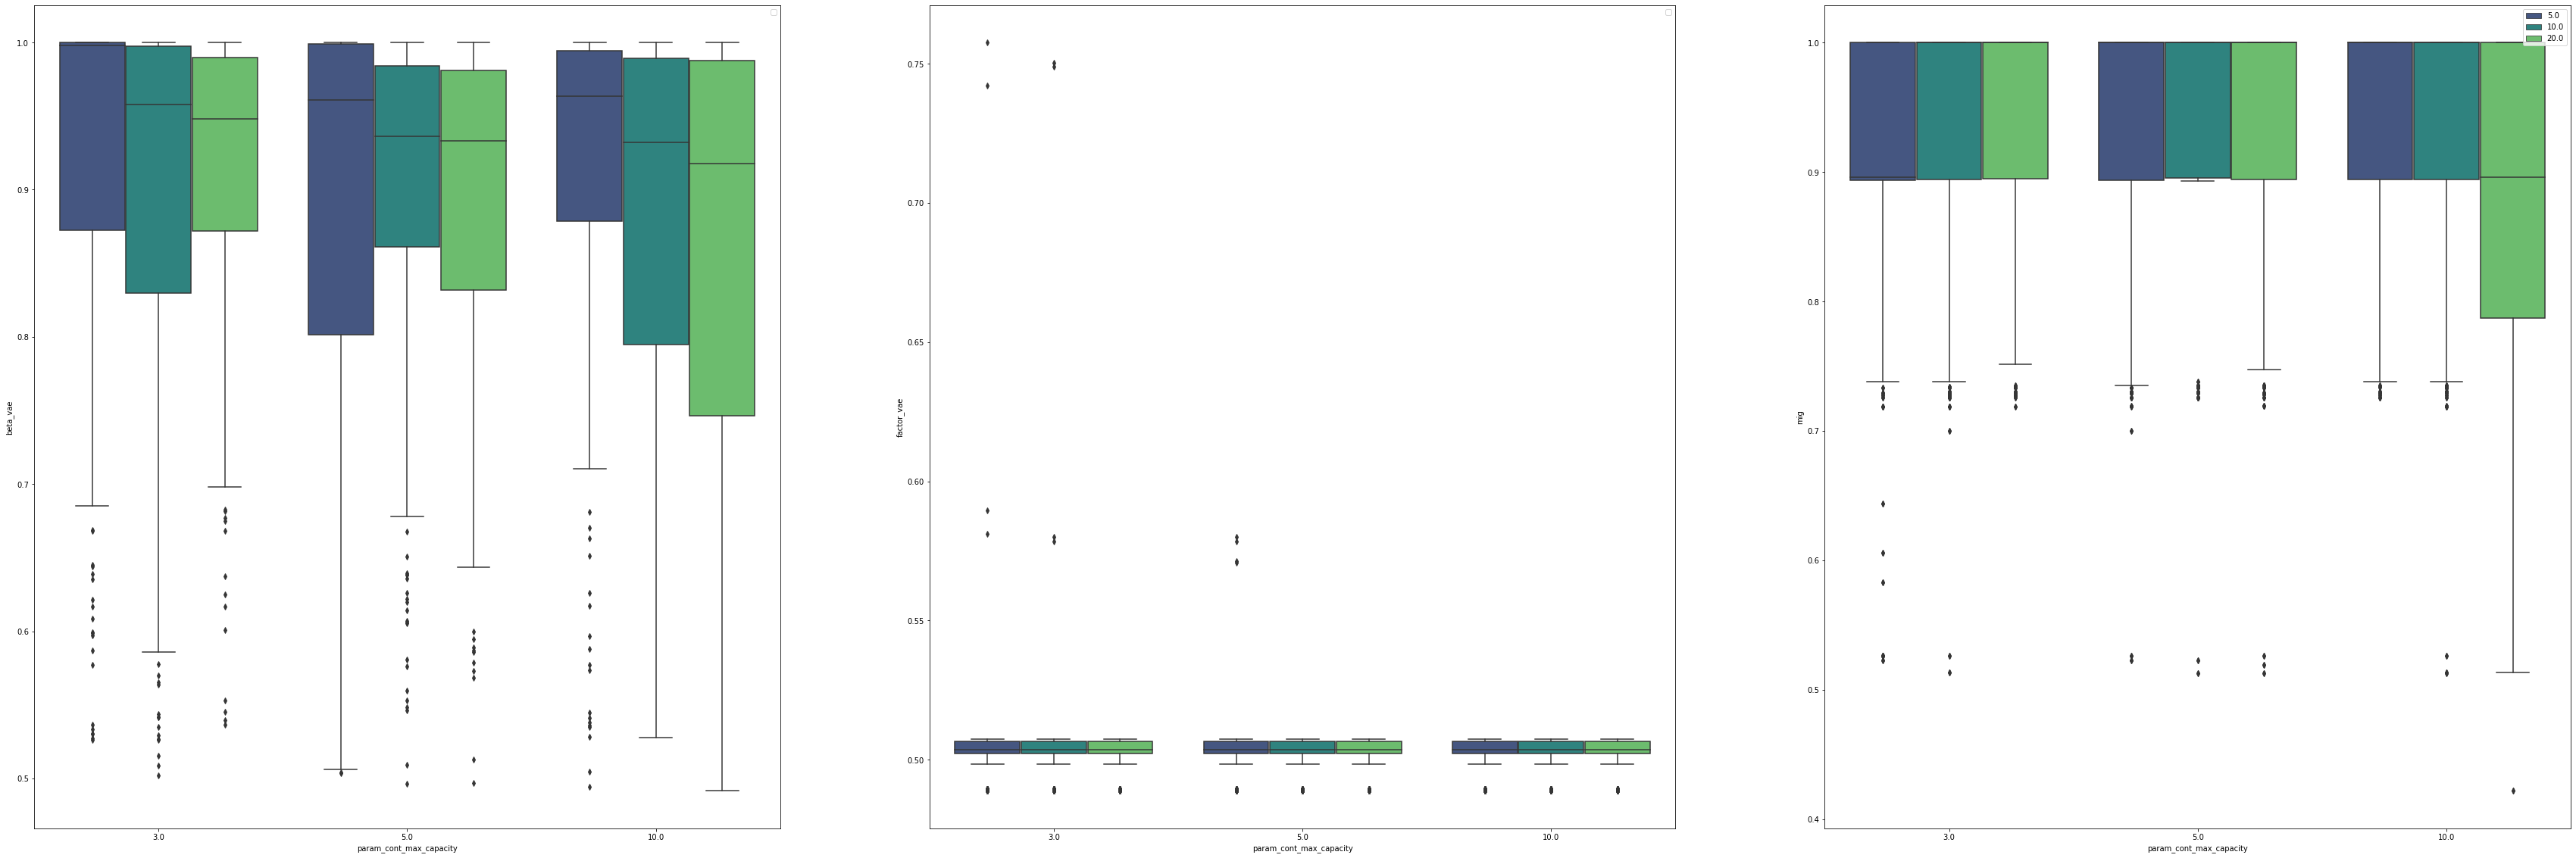

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_cont_max_capacity', y='beta_vae', hue='param_cont_gamma', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_cont_max_capacity', y='factor_vae', hue='param_cont_gamma', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_cont_max_capacity', y='mig', hue='param_cont_gamma', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

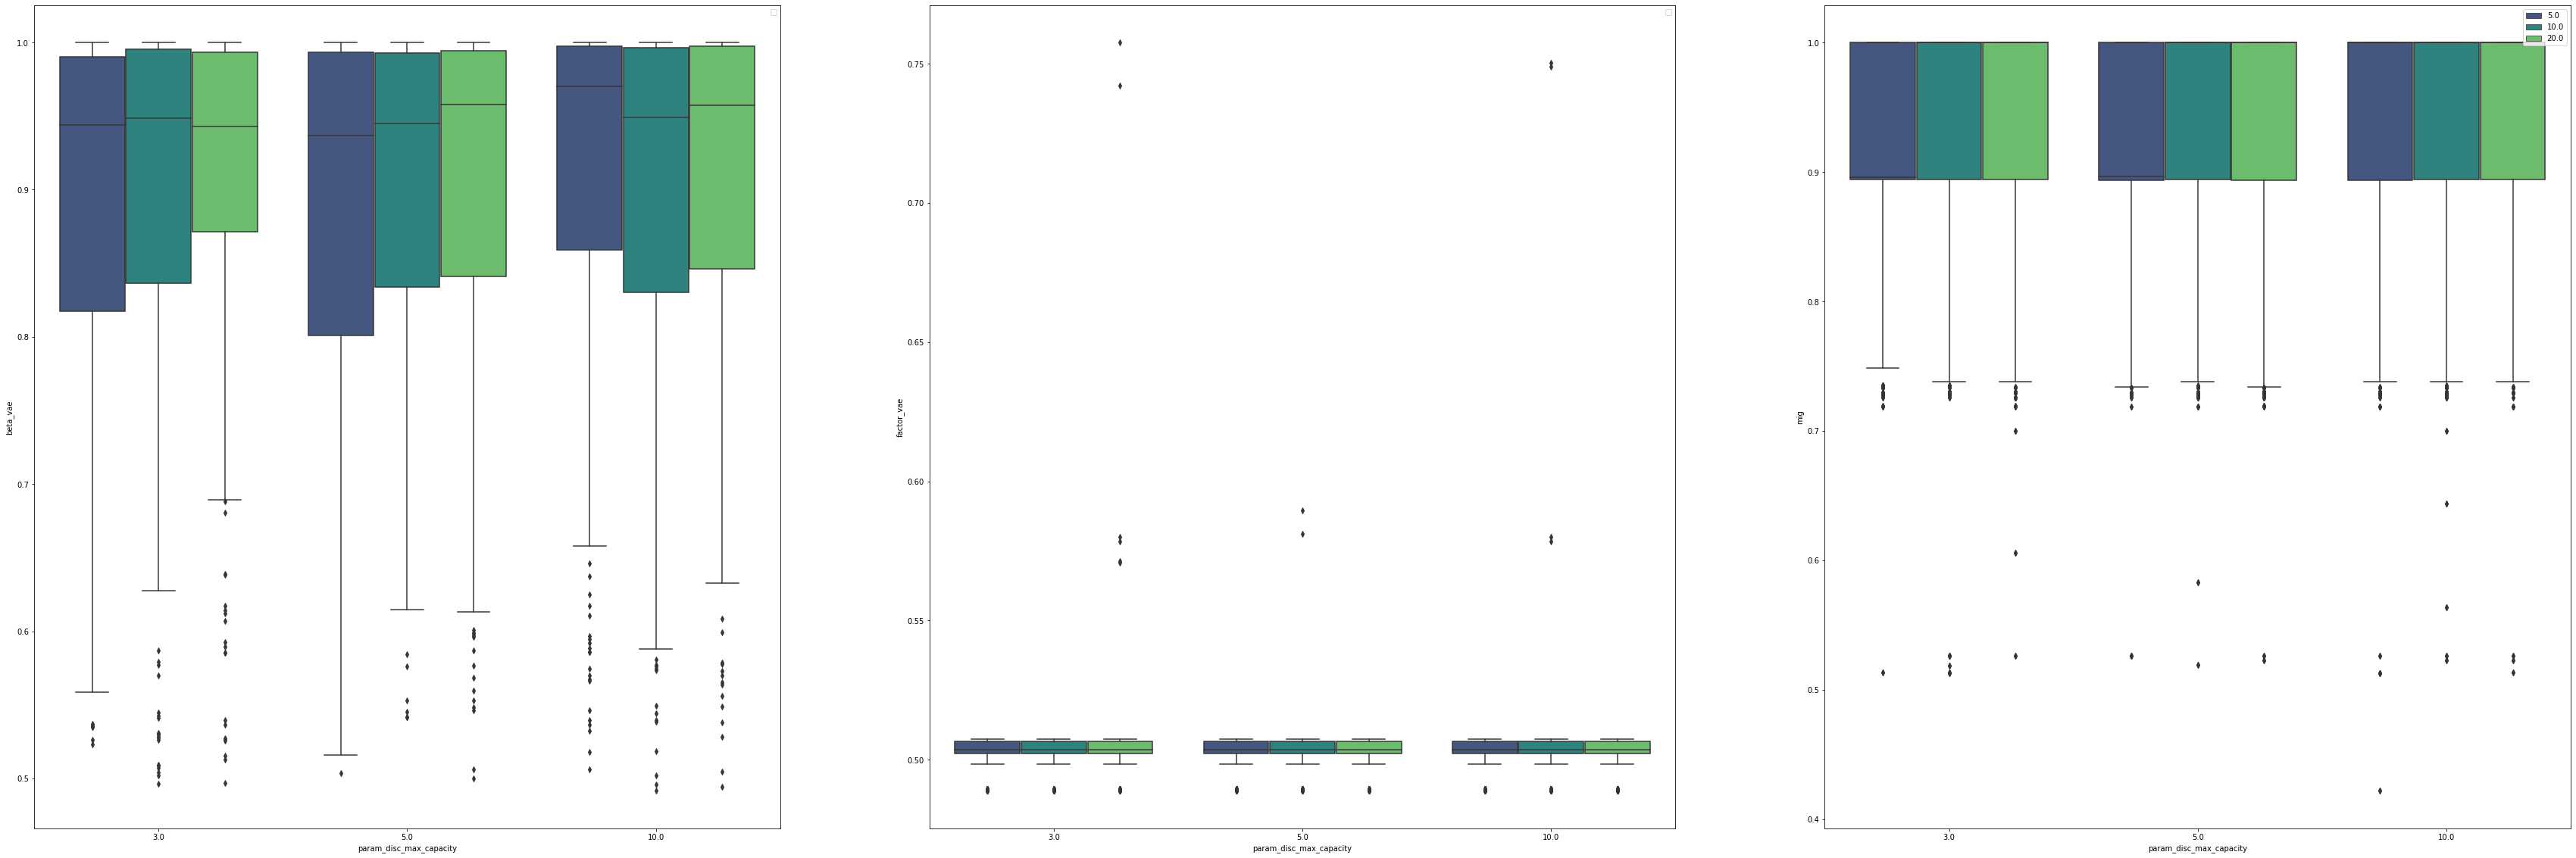

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_disc_max_capacity', y='beta_vae', hue='param_disc_gamma', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_disc_max_capacity', y='factor_vae', hue='param_disc_gamma', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_disc_max_capacity', y='mig', hue='param_disc_gamma', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

<AxesSubplot:xlabel='param_cont_max_capacity', ylabel='mig'>

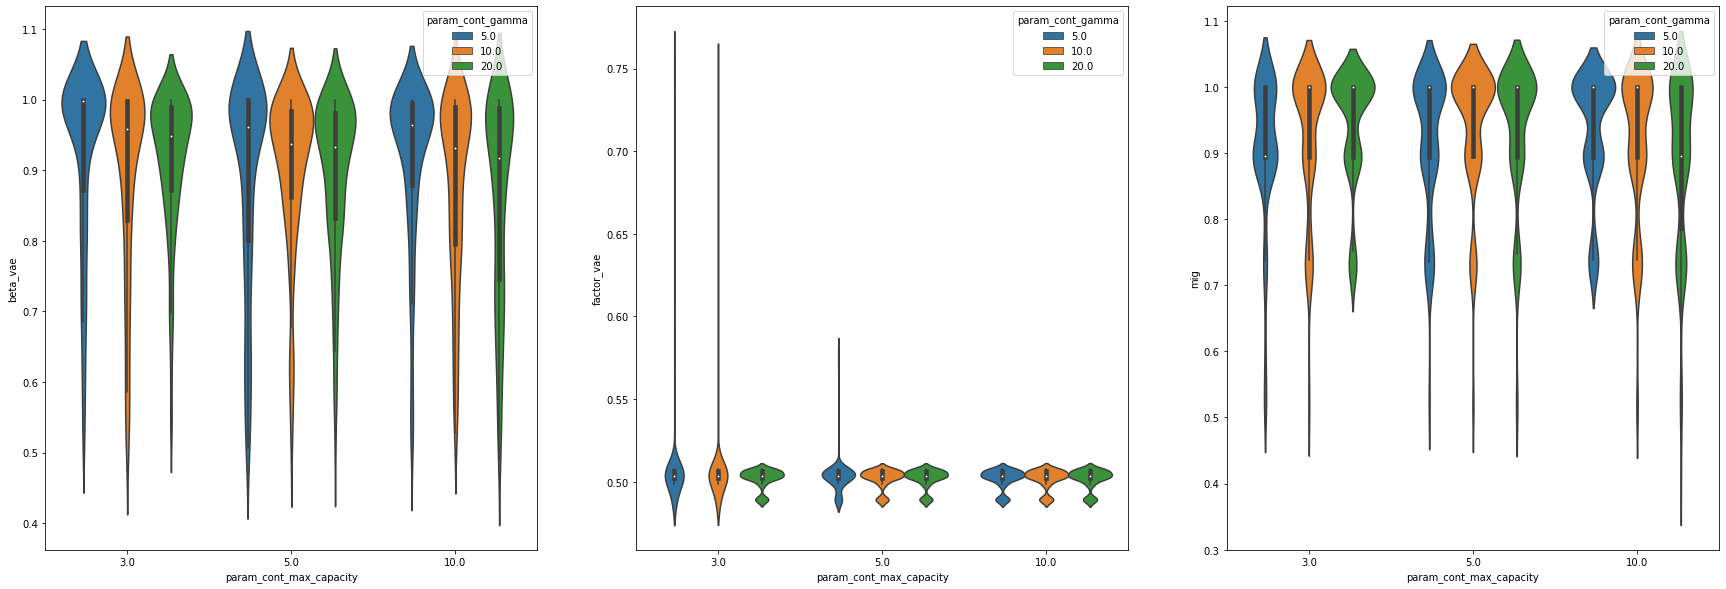

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
m = ['BetaVAE', 'FactorVAE', 'MIG']
sns.violinplot(data=df1, x='param_cont_max_capacity', y='beta_vae', hue='param_cont_gamma', ax=axs[0])
sns.violinplot(data=df1, x='param_cont_max_capacity', y='factor_vae', hue='param_cont_gamma', ax=axs[1])
sns.violinplot(data=df1, x='param_cont_max_capacity', y='mig', hue='param_cont_gamma', ax=axs[2])

<AxesSubplot:xlabel='param_disc_max_capacity', ylabel='mig'>

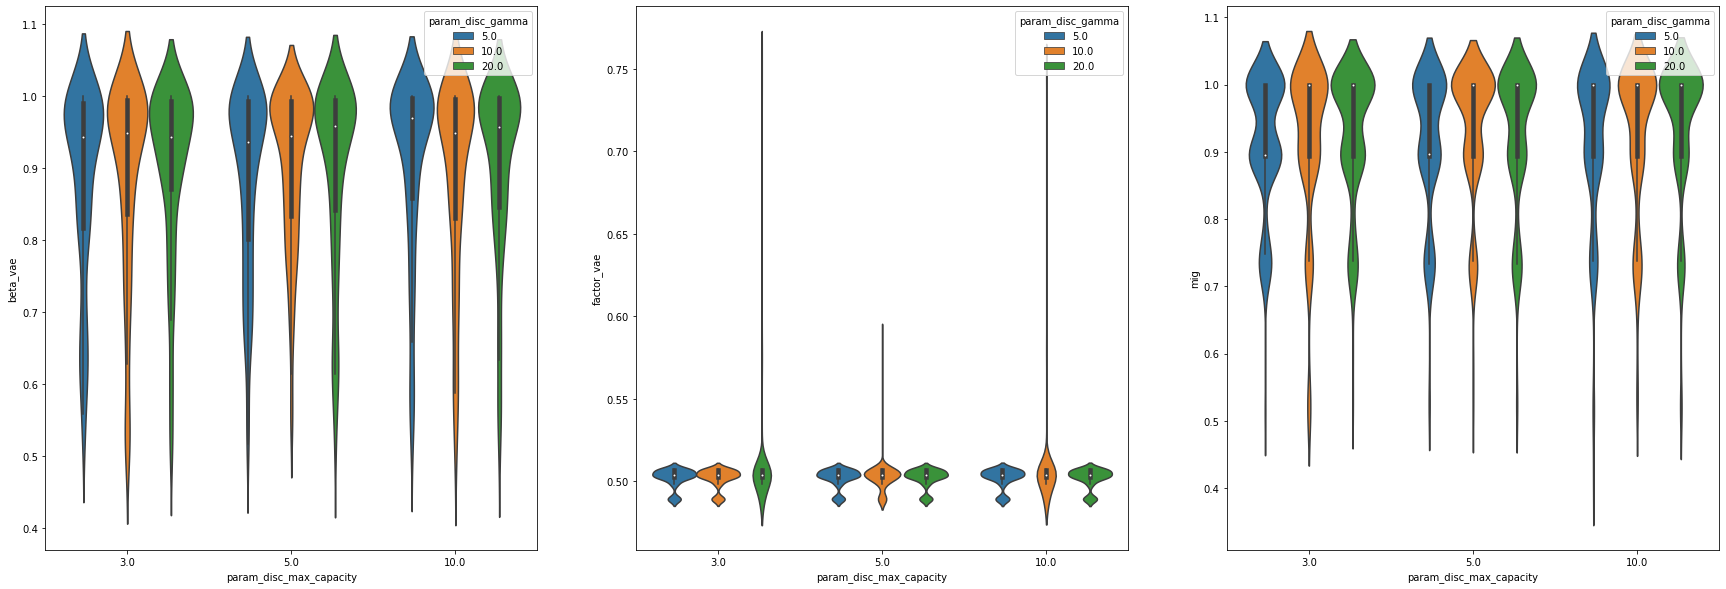

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
m = ['BetaVAE', 'FactorVAE', 'MIG']
sns.violinplot(data=df1, x='param_disc_max_capacity', y='beta_vae', hue='param_disc_gamma', ax=axs[0])
sns.violinplot(data=df1, x='param_disc_max_capacity', y='factor_vae', hue='param_disc_gamma', ax=axs[1])
sns.violinplot(data=df1, x='param_disc_max_capacity', y='mig', hue='param_disc_gamma', ax=axs[2])

<AxesSubplot:xlabel='param_cont_max_capacity', ylabel='mig'>

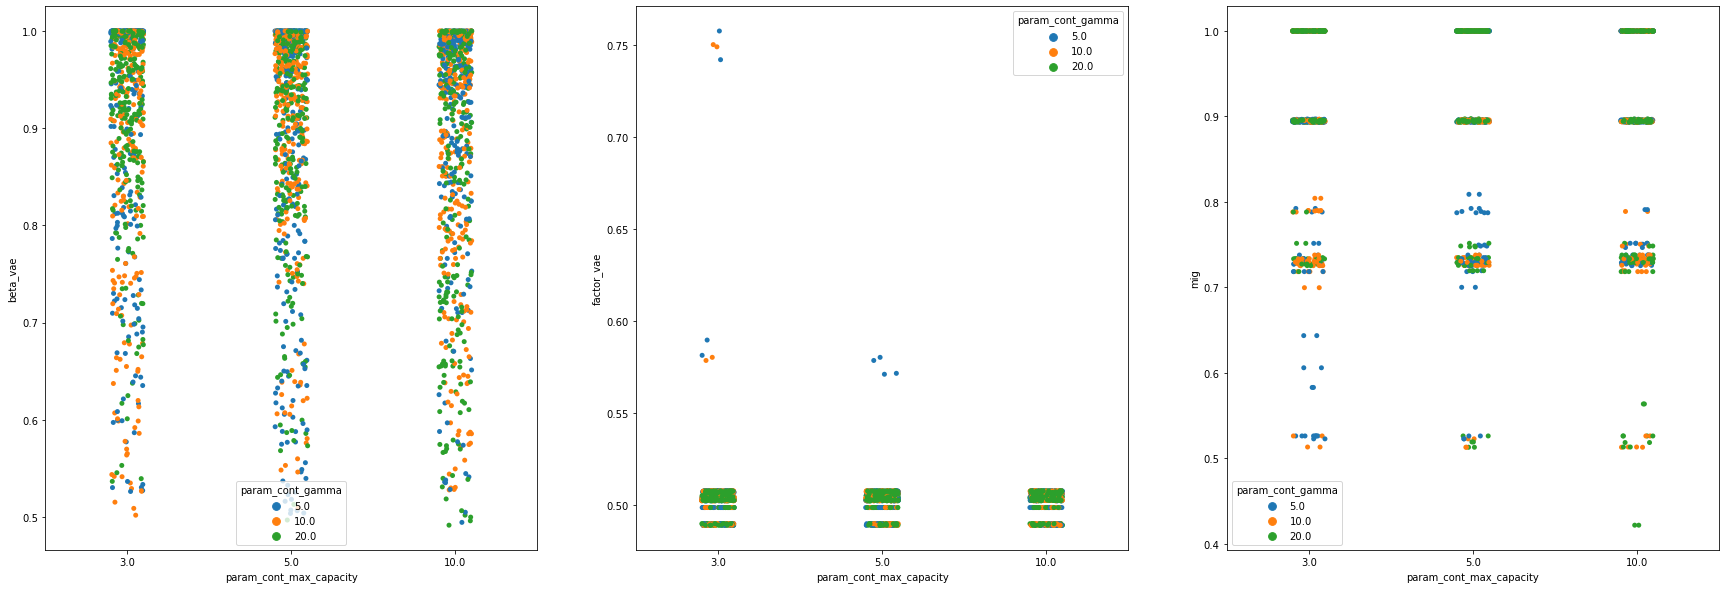

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
m = ['BetaVAE', 'FactorVAE', 'MIG']
sns.stripplot(data=df1, x='param_cont_max_capacity', y='beta_vae', hue='param_cont_gamma', ax=axs[0])
sns.stripplot(data=df1, x='param_cont_max_capacity', y='factor_vae', hue='param_cont_gamma', ax=axs[1])
sns.stripplot(data=df1, x='param_cont_max_capacity', y='mig', hue='param_cont_gamma', ax=axs[2])

<AxesSubplot:xlabel='param_disc_max_capacity', ylabel='mig'>

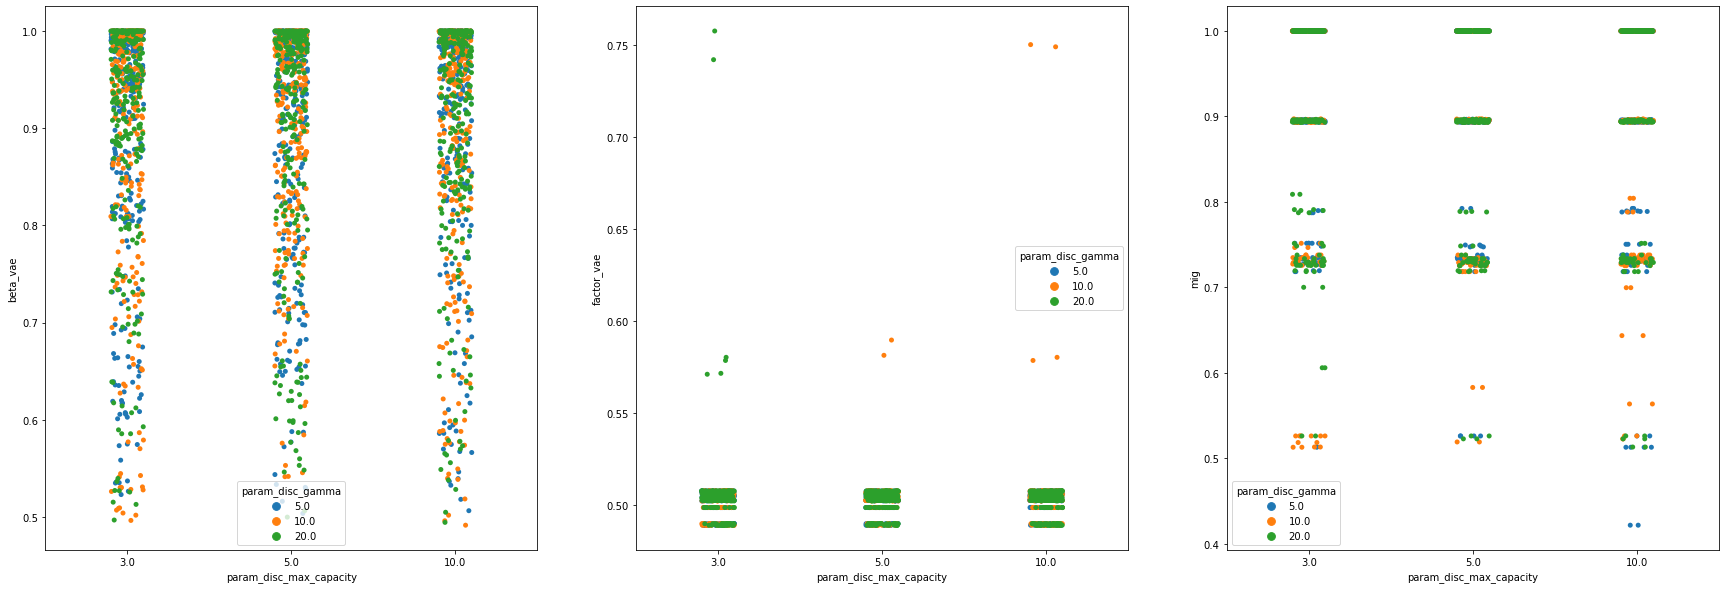

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
m = ['BetaVAE', 'FactorVAE', 'MIG']
sns.stripplot(data=df1, x='param_disc_max_capacity', y='beta_vae', hue='param_disc_gamma', ax=axs[0])
sns.stripplot(data=df1, x='param_disc_max_capacity', y='factor_vae', hue='param_disc_gamma', ax=axs[1])
sns.stripplot(data=df1, x='param_disc_max_capacity', y='mig', hue='param_disc_gamma', ax=axs[2])

### Disentanglement scores rank correlation per permutation

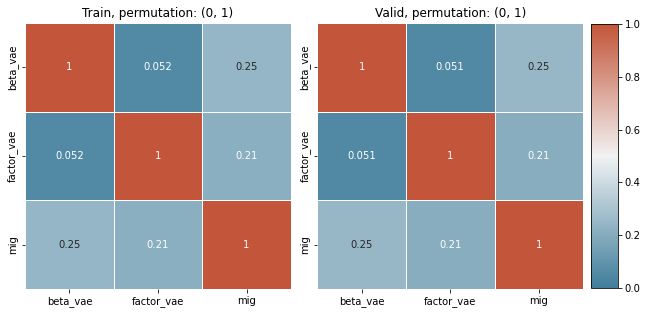

In [25]:
import scipy.stats
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for perm in [tuple(indices)]:
    dfp_train = df1[df1['permutation'].isin([str(perm)]) & df1['split'].isin(['train'])][['beta_vae', 'factor_vae', 'mig']]
    dfp_valid = df1[df1['permutation'].isin([str(perm)]) & df1['split'].isin(['valid'])][['beta_vae', 'factor_vae', 'mig']]
    c1, p1 = scipy.stats.spearmanr(dfp_train)
    c2, p2 = scipy.stats.spearmanr(dfp_valid)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].set_title('Train, permutation: ' + str(perm))
    axs[1].set_title('Valid, permutation: ' + str(perm))
    sns.heatmap(c1, cmap=cmap, square=True, ax=axs[0], vmin=0.0, vmax=1.0, annot=True, linewidths=.5, center=0.5,
        xticklabels=['beta_vae', 'factor_vae', 'mig'], yticklabels=['beta_vae', 'factor_vae', 'mig'], cbar=False)
    sns.heatmap(c2, cmap=cmap, square=True, ax=axs[1], vmin=0.0, vmax=1.0, annot=True, linewidths=.5, center=0.5,
        xticklabels=['beta_vae', 'factor_vae', 'mig'], yticklabels=['beta_vae', 'factor_vae', 'mig'], cbar=False)
    fig.colorbar(axs[0].get_children()[0], ax=axs.ravel().tolist(), aspect=10., anchor=(1.6, 0.5), shrink=0.97)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


### Pairwise scatter plot for different disentanglement metrics

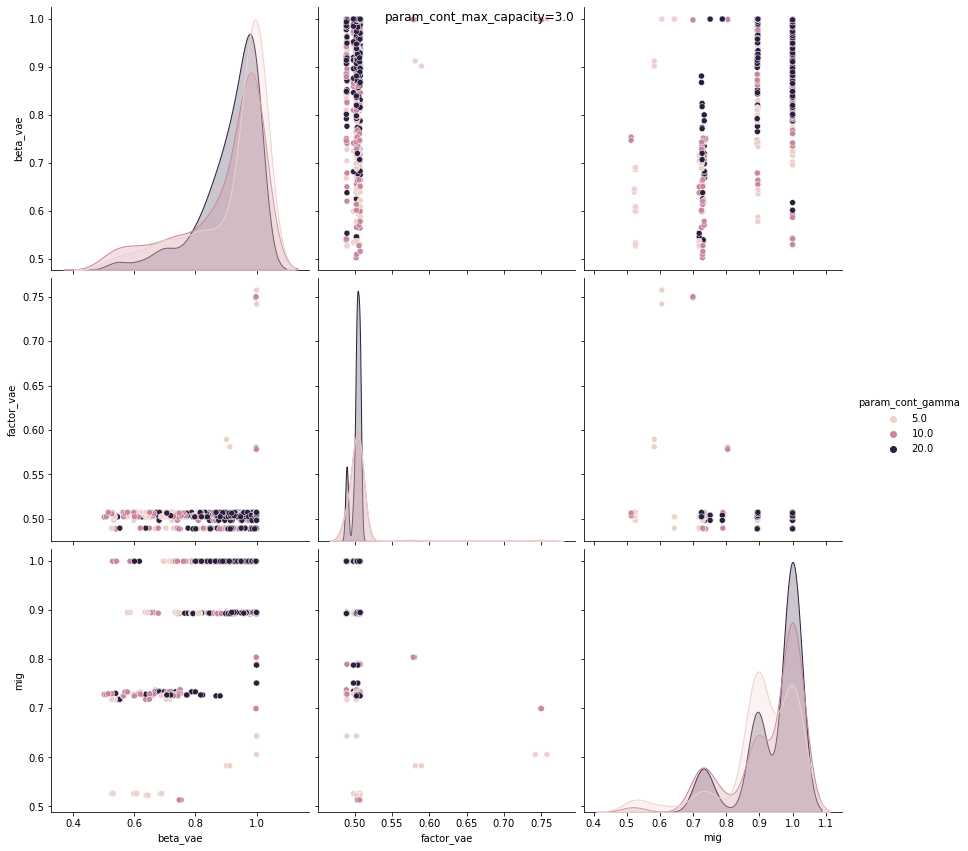

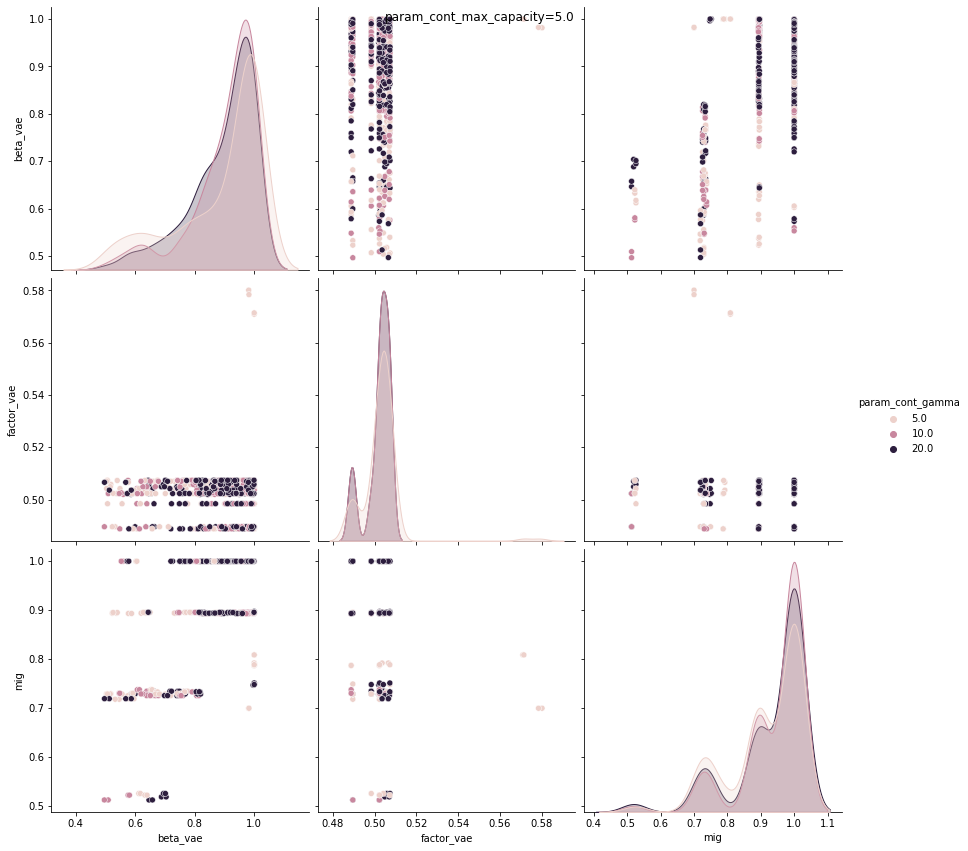

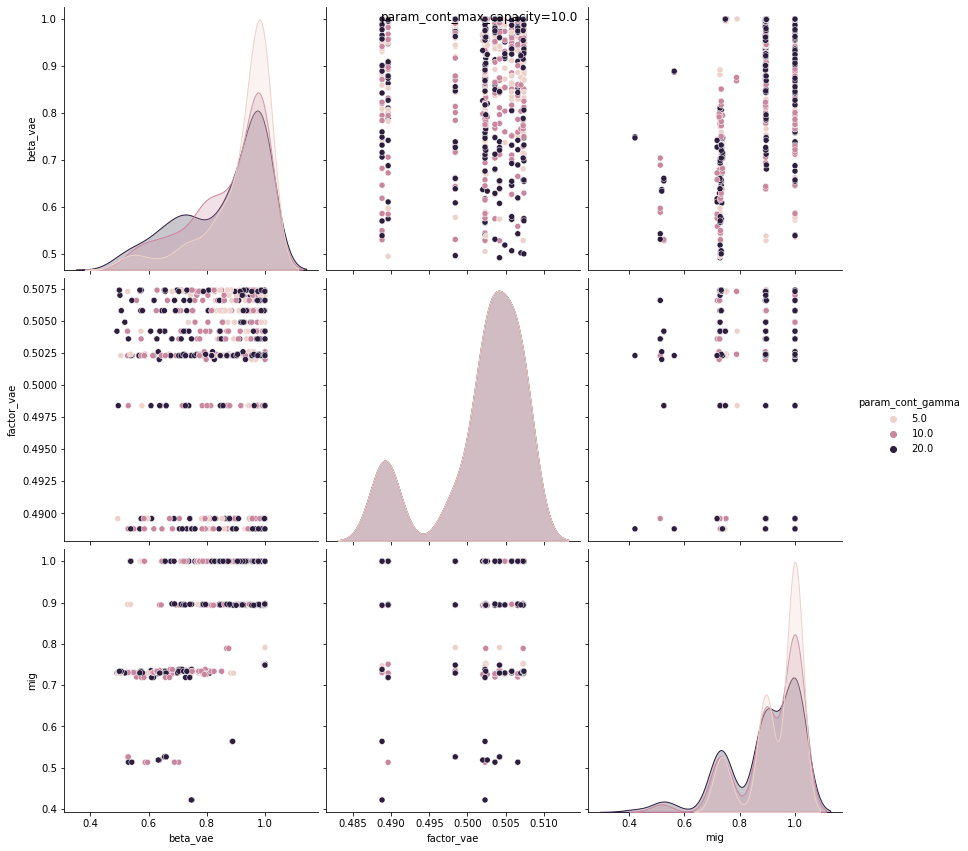

In [26]:
for n_peaks in df1['param_cont_max_capacity'].unique():
    g = sns.pairplot(df1[df1['param_cont_max_capacity'] == n_peaks][['beta_vae', 'factor_vae', 'mig', 'param_cont_gamma']], hue='param_cont_gamma', height=4)
    g.fig.suptitle('param_cont_max_capacity=' + str(n_peaks))

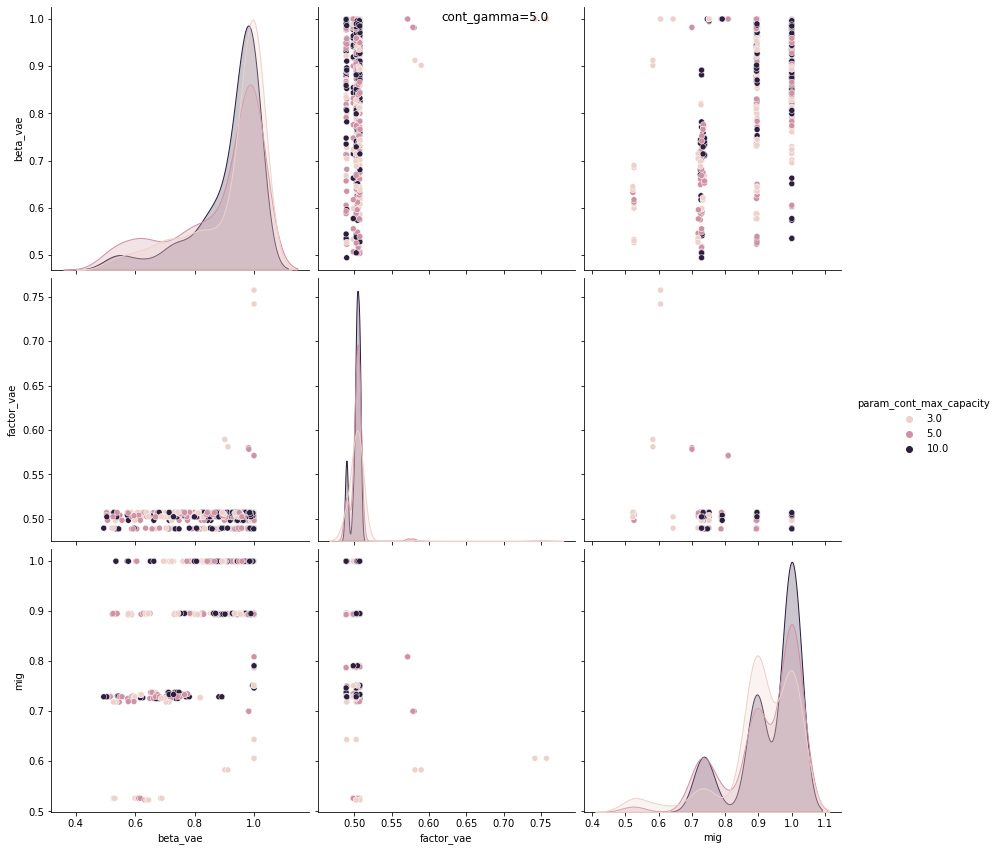

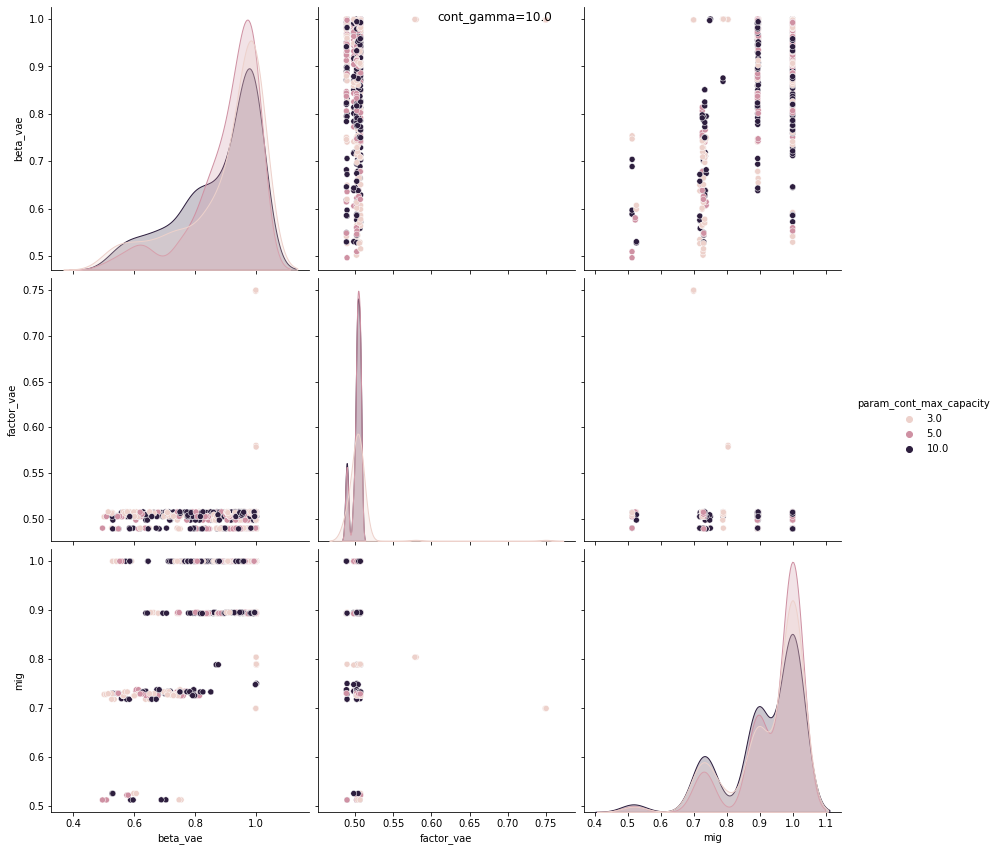

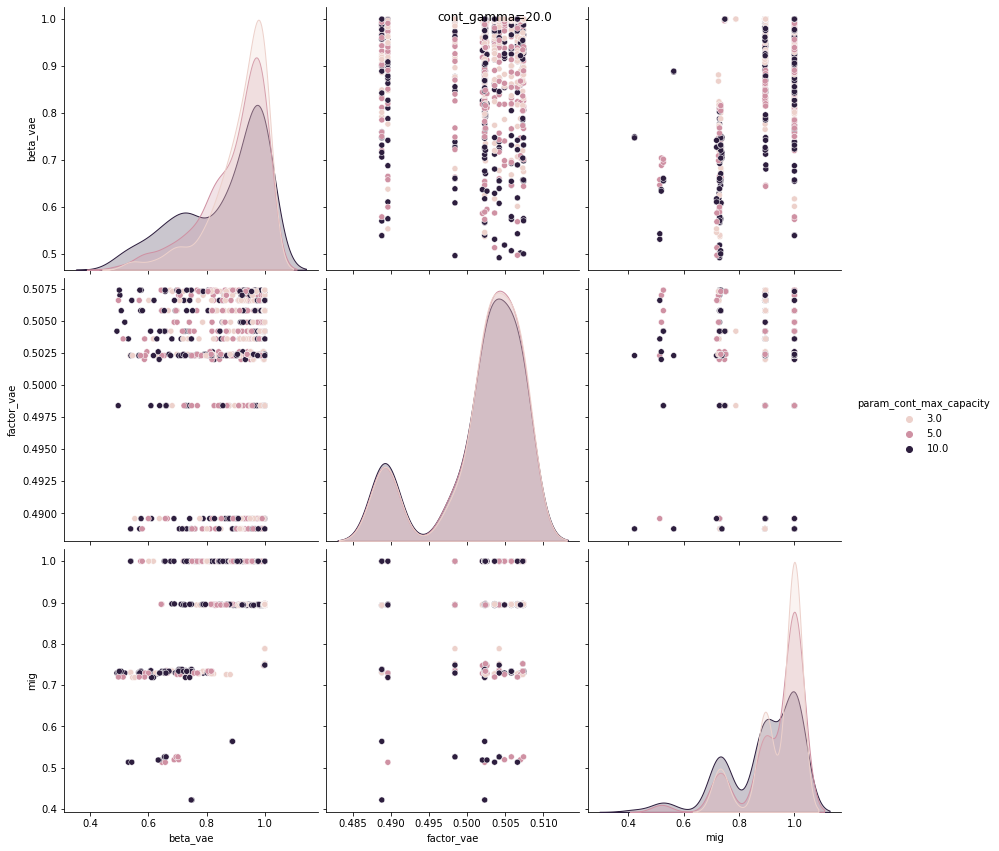

In [27]:
for beta in df1['param_cont_gamma'].unique():
    g = sns.pairplot(df1[df1['param_cont_gamma'] == beta][['beta_vae', 'factor_vae', 'mig', 'param_cont_max_capacity']], hue='param_cont_max_capacity', height=4)
    g.fig.suptitle('cont_gamma=' + str(beta))

### Variance of the disentanglement scores explained by different factors

#### Preprocess factors

In [28]:
# Assign categorical id to continuous variable: param_cont_max_capacity
param_cont_max_capacity_unique = df1['param_cont_max_capacity'].unique()
param_cont_max_capacity_map = dict(zip(param_cont_max_capacity_unique, range(len(param_cont_max_capacity_unique))))
df1['param_cont_max_capacity_id'] = df1.apply(lambda row: param_cont_max_capacity_map[row['param_cont_max_capacity']], axis=1)
param_cont_max_capacity_map, df1['param_cont_max_capacity_id'].unique()

({3.0: 0, 5.0: 1, 10.0: 2}, array([0, 1, 2], dtype=int64))

In [29]:
# Assign categorical id to continuous variable: param_disc_max_capacity
param_disc_max_capacity_unique = df1['param_disc_max_capacity'].unique()
param_disc_max_capacity_map = dict(zip(param_disc_max_capacity_unique, range(len(param_disc_max_capacity_unique))))
df1['param_disc_max_capacity_id'] = df1.apply(lambda row: param_disc_max_capacity_map[row['param_disc_max_capacity']], axis=1)
param_disc_max_capacity_map, df1['param_disc_max_capacity_id'].unique()

({3.0: 0, 5.0: 1, 10.0: 2}, array([0, 1, 2], dtype=int64))

In [30]:
# Assign categorical id to continuous variable: param_cont_gamma
param_cont_gamma_unique = df1['param_cont_gamma'].unique()
param_cont_gamma_map = dict(zip(param_cont_gamma_unique, range(len(param_cont_gamma_unique))))
df1['param_cont_gamma_id'] = df1.apply(lambda row: param_cont_gamma_map[row['param_cont_gamma']], axis=1)
param_cont_gamma_map, df1['param_cont_gamma_id'].unique()

({5.0: 0, 10.0: 1, 20.0: 2}, array([0, 1, 2], dtype=int64))

In [31]:
# Assign categorical id to continuous variable: param_disc_gamma
param_disc_gamma_unique = df1['param_disc_gamma'].unique()
param_disc_gamma_map = dict(zip(param_disc_gamma_unique, range(len(param_disc_gamma_unique))))
df1['param_disc_gamma_id'] = df1.apply(lambda row: param_disc_gamma_map[row['param_disc_gamma']], axis=1)
param_disc_gamma_map, df1['param_disc_gamma_id'].unique()

({5.0: 0, 10.0: 1, 20.0: 2}, array([0, 1, 2], dtype=int64))

In [32]:
# Assign categorical id to continuous variable: layer_config
def reduce_layer_config(row):
    layer_config = ast.literal_eval(row['layer_config'])
    encoder, decoder = layer_config[0][1:], layer_config[1][:-1]
    return str([encoder, decoder])

df1['arch'] = df1.apply(reduce_layer_config, axis=1)
arch_unique = df1['arch'].unique()
arch_map = dict(zip(arch_unique, range(len(arch_unique))))
df1['arch_id'] = df1.apply(lambda row: arch_map[row['arch']], axis=1)
arch_map, df1['arch_id'].unique()

({'[[100, 2], [2, 100]]': 0,
  '[[200, 2], [2, 200]]': 1,
  '[[400, 2], [2, 400]]': 2,
  '[[800, 2], [2, 800]]': 3,
  '[[1600, 2], [2, 1600]]': 4,
  '[[1600, 100, 2], [2, 100, 1600]]': 5,
  '[[800, 100, 2], [2, 100, 800]]': 6,
  '[[400, 100, 2], [2, 100, 400]]': 7,
  '[[200, 100, 2], [2, 100, 200]]': 8,
  '[[100, 90, 2], [2, 90, 100]]': 9,
  '[[1600, 200, 50, 2], [2, 50, 200, 1600]]': 10,
  '[[800, 200, 50, 2], [2, 50, 200, 800]]': 11,
  '[[400, 200, 50, 2], [2, 50, 200, 400]]': 12,
  '[[200, 100, 50, 2], [2, 50, 100, 200]]': 13,
  '[[100, 90, 50, 2], [2, 50, 90, 100]]': 14},
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64))

#### One hot encode

In [33]:
def one_hot_encode(df, name):
    id = df[name].to_numpy()
    ids = np.unique(id)
    n_values = np.max(ids) + 1
    return np.eye(n_values)[id]

In [34]:
param_cont_max_capacity_ohe = one_hot_encode(df1, 'param_cont_max_capacity_id')
param_disc_max_capacity_ohe = one_hot_encode(df1, 'param_disc_max_capacity_id')
param_cont_gamma_ohe = one_hot_encode(df1, 'param_cont_gamma_id')
param_disc_gamma_ohe = one_hot_encode(df1, 'param_disc_gamma_id')
arch_ohe = one_hot_encode(df1, 'arch_id')
param_cont_max_capacity_ohe.shape, param_disc_max_capacity_ohe.shape, param_cont_gamma_ohe.shape, param_disc_gamma_ohe.shape, arch_ohe.shape

((2430, 3), (2430, 3), (2430, 3), (2430, 3), (2430, 15))

In [35]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

def linear_regression(X, y):
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)

    mse = skm.mean_squared_error(y, y_pred)
    mae = skm.mean_absolute_error(y, y_pred)
    me  = skm.max_error(y, y_pred)
    evs = skm.explained_variance_score(y, y_pred)
    return mse, mae, me, evs

In [36]:
scores = []

In [37]:
score_names = ['beta_vae', 'factor_vae', 'mig']
for score_name in score_names:
    X = np.hstack((param_cont_max_capacity_ohe, param_disc_max_capacity_ohe, param_cont_gamma_ohe, param_disc_gamma_ohe, arch_ohe))
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 1, 1, 1, 1, 1])

    X = param_cont_max_capacity_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 1, 0, 0, 0, 0])

    X = param_disc_max_capacity_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 0, 1, 0, 0, 0])

    X = param_cont_gamma_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 0, 0, 1, 0, 0])

    X = param_disc_gamma_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 0, 0, 0, 1, 0])

    X = arch_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 0, 0, 0, 0, 1])

In [38]:
df_scores = pd.DataFrame(scores, columns=['MSE', 'MAE', 'ME', 'EVS', 'target_value', 'param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'])
df_scores

,MSE,MAE,ME,EVS,target_value,param_cont_max_capacity,param_disc_max_capacity,param_cont_gamma,param_disc_gamma,arch
0,0.012952,0.085457,0.449239,0.201406,beta_vae,1,1,1,1,1
1,0.016109,0.101055,0.406885,0.006754,beta_vae,1,0,0,0,0
2,0.016205,0.101591,0.407670,0.000829,beta_vae,0,1,0,0,0
3,0.016150,0.101180,0.412342,0.004245,beta_vae,0,0,1,0,0
4,0.016205,0.101627,0.405258,0.000872,beta_vae,0,0,0,1,0
5,0.013142,0.086773,0.442536,0.189724,beta_vae,0,0,0,0,1
6,0.000149,0.004890,0.248079,0.035484,factor_vae,1,1,1,1,1
7,0.000153,0.004784,0.253966,0.004011,factor_vae,1,0,0,0,0
8,0.000154,0.004723,0.254674,0.000736,factor_vae,0,1,0,0,0
9,0.000154,0.004756,0.254520,0.001536,factor_vae,0,0,1,0,0


In [39]:
index = df_scores[df_scores['target_value'] == 'beta_vae'].copy()[['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch']]
beta_vae_score = df_scores[df_scores['target_value'] == 'beta_vae'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
factor_vae_score = df_scores[df_scores['target_value'] == 'factor_vae'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
factor_vae_score.index = beta_vae_score.index
mig_score = df_scores[df_scores['target_value'] == 'mig'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
mig_score.index = factor_vae_score.index
df_scores_ = pd.concat([beta_vae_score, factor_vae_score, mig_score], axis=1, ignore_index=True)
df_scores_= df_scores_.rename(columns={
    0: "beta_vae_MSE", 1: "beta_vae_MAE", 2: 'beta_vae_ME', 3: 'beta_vae_EVS',
    4: "factor_vae_MSE", 5: "factor_vae_MAE", 6: 'factor_vae_ME', 7: 'factor_vae_EVS',
    8: "mig_MSE", 9: "mig_MAE", 10: 'mig_ME', 11: 'mig_EVS'})

# for col in df_scores_.columns:
#     df_scores_[col] = df_scores_[col]
df_scores = pd.concat([df_scores_, index], axis=1)
df_scores['config'] = 'Config'
df_scores

,beta_vae_MSE,beta_vae_MAE,beta_vae_ME,beta_vae_EVS,factor_vae_MSE,factor_vae_MAE,factor_vae_ME,factor_vae_EVS,mig_MSE,mig_MAE,mig_ME,mig_EVS,param_cont_max_capacity,param_disc_max_capacity,param_cont_gamma,param_disc_gamma,arch,config
0,0.012952,0.085457,0.449239,0.201406,0.000149,0.004890,0.248079,0.035484,0.011382,0.083545,0.471956,0.043926,1,1,1,1,1,Config
1,0.016109,0.101055,0.406885,0.006754,0.000153,0.004784,0.253966,0.004011,0.011856,0.085357,0.490318,0.004080,1,0,0,0,0,Config
2,0.016205,0.101591,0.407670,0.000829,0.000154,0.004723,0.254674,0.000736,0.011897,0.085516,0.503450,0.000650,0,1,0,0,0,Config
3,0.016150,0.101180,0.412342,0.004245,0.000154,0.004756,0.254520,0.001536,0.011896,0.085638,0.499090,0.000747,0,0,1,0,0,Config
4,0.016205,0.101627,0.405258,0.000872,0.000154,0.004757,0.254716,0.001375,0.011876,0.085154,0.492220,0.002589,0,0,0,1,0,Config
5,0.013142,0.086773,0.442536,0.189724,0.000150,0.004912,0.249971,0.027873,0.011452,0.084452,0.487215,0.038033,0,0,0,0,1,Config


In [40]:
# fig, axs = plt.subplots(figsize=(15, 15))
# axs.scatter(y, y_pred)
# axs.plot([np.min(y) - 0.01, np.max(y) + 0.01], [np.min(y_pred) - 0.01, np.max(y_pred) + 0.01], linestyle='dashed', color='red')

In [41]:
from specvae.visualize import multi_index_heatmap

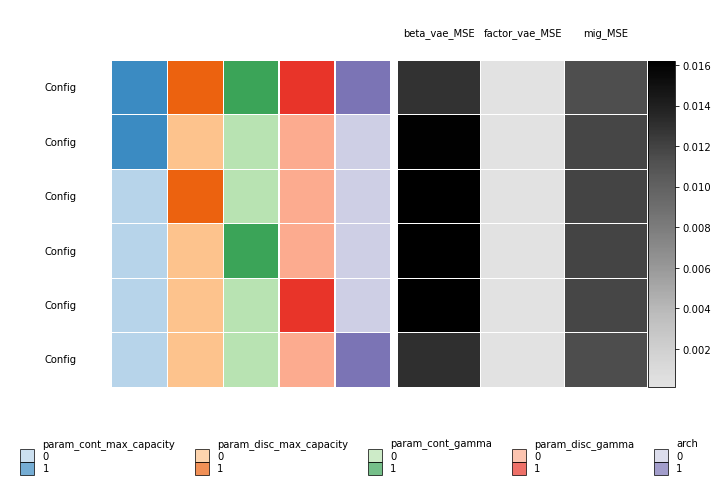

In [42]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'], 
    sample_columns=['beta_vae_MSE', 'factor_vae_MSE', 'mig_MSE'])

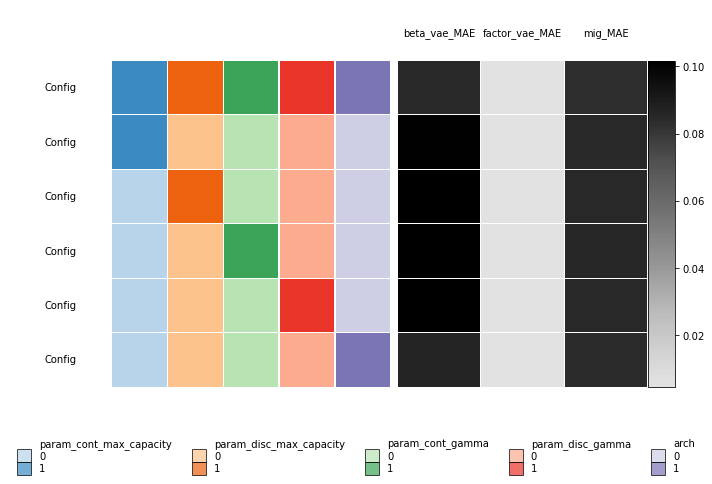

In [43]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'], 
    sample_columns=['beta_vae_MAE', 'factor_vae_MAE', 'mig_MAE'])

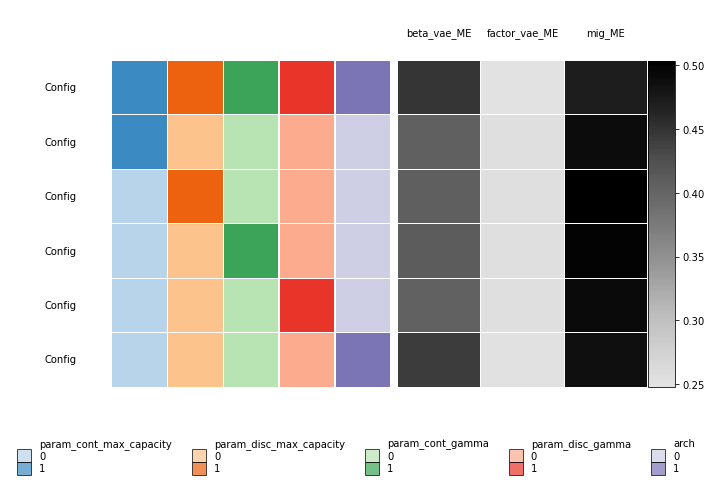

In [44]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'], 
    sample_columns=['beta_vae_ME', 'factor_vae_ME', 'mig_ME'])

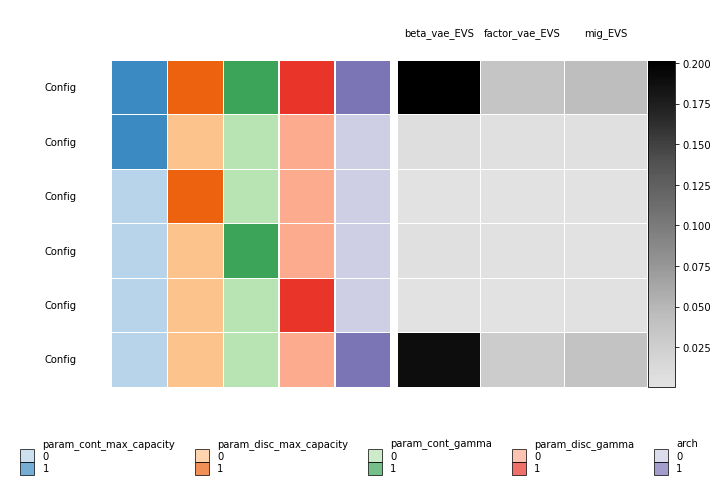

In [45]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'], 
    sample_columns=['beta_vae_EVS', 'factor_vae_EVS', 'mig_EVS'])